In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sys.path.append('/users/mtaranov/LongRange3D/')
from models import LongRangeDNN
from utils import concat_motifs, get_features, get_labels, subsample_data, normalize_features, reconstruct_2d, printMatrix, binarize, zscore, get_2D, plot_prediction, change_scale
#from sklearn.preprocessing import MinMaxScaler, StandardScaler

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

ERROR (theano.sandbox.cuda): ERROR: Not using GPU. Initialisation of device 0 failed:
initCnmem: cnmemInit call failed! Reason=CNMEM_STATUS_OUT_OF_MEMORY. numdev=1

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

ERROR (theano.sandbox.cuda): ERROR: Not using GPU. Initialisation of device gpu failed:
initCnmem: cnmemInit call failed! Reason=CNMEM_STATUS_OUT_OF_MEMORY. numdev=1



RuntimeError: ('initCnmem: cnmemInit call failed! Reason=CNMEM_STATUS_OUT_OF_MEMORY. numdev=1\n', 'You asked to force this device and it failed. No fallback to the cpu or other gpu device.')

In [22]:
contacts='PE'
path='/users/mtaranov/datasets_3d/dist_matched_'+contacts+'/'

X_train_node1 = path+'motifs/train_'+contacts+'_out_node1_3_0.0001/mat.npy'
X_train_node2 = path+'motifs/train_'+contacts+'_out_node2_3_0.0001/mat.npy'
X_test_node1 = path+'motifs/test_'+contacts+'_out_node1_3_0.0001/mat.npy'
X_test_node2 = path+'motifs/test_'+contacts+'_out_node2_3_0.0001/mat.npy'
X_valid_node1 = path+'motifs/valid_'+contacts+'_out_node1_3_0.0001/mat.npy'
X_valid_node2 = path+'motifs/valid_'+contacts+'_out_node2_3_0.0001/mat.npy'

y_train = get_labels(path+'y_train_thres_10.npy')
y_test = get_labels(path+'y_test_thres_10.npy')
y_valid = get_labels(path+'y_valid_thres_10.npy')

X_train=concat_motifs(X_train_node1, X_train_node2)
X_test=concat_motifs(X_test_node1, X_test_node2)
X_valid=concat_motifs(X_valid_node1, X_valid_node2)

In [5]:
X_test.shape

(1812, 1, 1920, 2)

In [6]:
X_train_normalized, X_valid_normalized, X_test_normalized = normalize_features(X_train, X_valid, X_test)

#X_train_normalized_subsampled, y_train_subsampled = subsample_data(X_train_normalized, y_train)
#X_valid_normalized_subsampled, y_valid_subsampled = subsample_data(X_valid_normalized, y_valid)
#X_test_normalized_subsampled, y_test_subsampled = subsample_data(X_test_normalized, y_test)

#X_train_scaled_subsampled, y_train_subsampled = subsample_data(X_train_scaled, y_train)
#X_valid_scaled_subsampled, y_valid_subsampled = subsample_data(X_valid_scaled, y_valid)
#X_test_scaled_subsampled, y_test_subsampled = subsample_data(X_test_scaled, y_test)


# from motifs

In [7]:
from models_motif import LongRangeDNN
dnn_normalized = LongRangeDNN(num_features=1920, use_deep_CNN=True)

/users/mtaranov/local/anaconda2/lib/python2.7/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"


In [8]:
#validation_data = (X_valid_normalized_subsampled[:, :, :10, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :10, :], y_train_subsampled, validation_data)
validation_data = (X_valid_normalized, y_valid)
dnn_normalized.train(X_train_normalized, y_train, validation_data)
#validation_data = (X_valid_normalized[:, :, [0]+[i+10 for i in range(1921)], :], y_valid)
#dnn_normalized.train(X_train_normalized[:, :, [0]+[i+10 for i in range(1921)], :], y_train, validation_data)

Training model...
Train on 4824 samples, validate on 2872 samples
Epoch 1/100
4750/4824 [============================>.] - ETA: 0s - loss: 2.0536Epoch 0: validation loss: 0.665
Balanced Accuracy: 61.42%	 auROC: 0.651	 auPRC: 0.633	 auPRG: 0.306
Recall at 5%|10%|20% FDR: 0.6%|0.6%|1.5%	 Num Positives: 1436	 Num Negatives: 1436	 

4824/4824 [==============================] - 1s - loss: 2.0478 - val_loss: 0.6646
Epoch 2/100
4750/4824 [============================>.] - ETA: 0s - loss: 1.6222Epoch 1: validation loss: 0.664
Balanced Accuracy: 61.53%	 auROC: 0.656	 auPRC: 0.635	 auPRG: 0.315
Recall at 5%|10%|20% FDR: 0.4%|1.3%|1.7%	 Num Positives: 1436	 Num Negatives: 1436	 

4824/4824 [==============================] - 1s - loss: 1.6200 - val_loss: 0.6639
Epoch 3/100
4750/4824 [============================>.] - ETA: 0s - loss: 1.5410Epoch 2: validation loss: 0.663
Balanced Accuracy: 62.05%	 auROC: 0.658	 auPRC: 0.639	 auPRG: 0.325
Recall at 5%|10%|20% FDR: 0.7%|1.3%|2.7%	 Num Positives: 1436

In [9]:
print(dnn_normalized.test(X_test_normalized, y_test))
#print(dnn_normalized.test(X_test_normalized[:, :, [0]+[i+10 for i in range(1921)], :], y_test))

Balanced Accuracy: 76.55%	 auROC: 0.853	 auPRC: 0.863	 auPRG: 0.739
Recall at 5%|10%|20% FDR: 32.3%|52.0%|75.8%	 Num Positives: 906	 Num Negatives: 906	 


In [10]:
print(dnn_normalized.test(X_train_normalized, y_train))
#print(dnn_normalized.test(X_test_normalized[:, :, [0]+[i+10 for i in range(1921)], :], y_test))

Balanced Accuracy: 99.90%	 auROC: 1.000	 auPRC: 1.000	 auPRG: 1.000
Recall at 5%|10%|20% FDR: 100.0%|100.0%|100.0%	 Num Positives: 2412	 Num Negatives: 2412	 


In [11]:
print(dnn_normalized.test(X_valid_normalized, y_valid))
#print(dnn_normalized.test(X_test_normalized[:, :, [0]+[i+10 for i in range(1921)], :], y_test))

Balanced Accuracy: 75.56%	 auROC: 0.844	 auPRC: 0.856	 auPRG: 0.721
Recall at 5%|10%|20% FDR: 29.7%|52.2%|72.1%	 Num Positives: 1436	 Num Negatives: 1436	 


In [10]:
#pred_probs_test = dnn_normalized.predict(X_test_normalized[:, :, :10, :])
#np.save("model_predictions/test_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_test)
#pred_probs_valid = dnn_normalized.predict(X_valid_normalized[:, :, :10, :])
#np.save("model_predictions/valid_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_valid)
#pred_probs_train = dnn_normalized.predict(X_train_normalized[:, :, :10, :])
#np.save("model_predictions/train_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_train)

In [23]:
#save model and weights
dnn_normalized.save(contacts+'_dnn_CONV_motifs', '/users/mtaranov/LongRange3D/')

# DeepLift

In [24]:
weights='/users/mtaranov/LongRange3D/weights/'+contacts+'_dnn_CONV_motifs.weights.h5'
json_model='/users/mtaranov/LongRange3D/models/'+contacts+'_dnn_CONV_motifs.arch.json'

In [25]:
scores = dnn_normalized.deeplift(X_valid_normalized, weights, json_model, batch_size=128)

nonlinear_mxts_mode is set to: Gradient


In [26]:
np.save('/users/mtaranov/LongRange3D/deeplift_scores/'+contacts+'_scores_dnn_CONV_motifs.npy', scores)

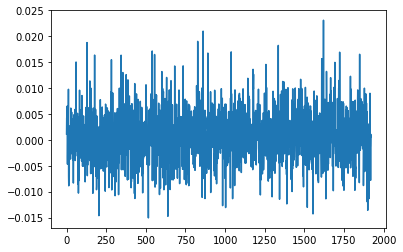

In [27]:
plt.plot(np.mean(scores[:, 0, :, 0], axis=0))

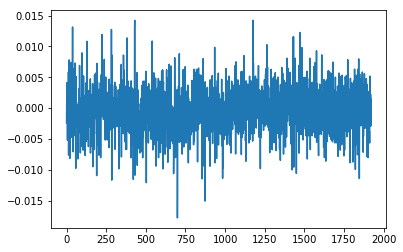

In [28]:
plt.plot(np.mean(scores[:, 0, :, 1], axis=0))

In [29]:
vmin = np.min(np.concatenate((scores[:, 0, :, 0], scores[:, 0, :, 1]), axis=1))
vmax = np.max(np.concatenate((scores[:, 0, :, 0], scores[:, 0, :, 1]), axis=1))

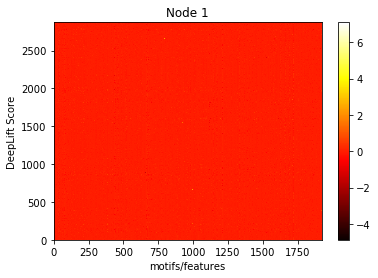

In [30]:
#plt.imshow(scores[:, 0, :, 0], cmap='hot', interpolation='nearest')
plt.pcolor(scores[:, 0, :, 0], cmap='hot', vmin=vmin, vmax=vmax) # cmap='RdBu'
plt.xlabel('motifs/features')
plt.ylabel('DeepLift Score')
plt.title('Node 1')
plt.colorbar()

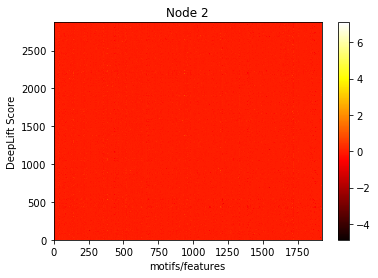

In [31]:
#plt.imshow(scores[:, 0, :, 1], cmap='hot', interpolation='nearest')
plt.pcolor(scores[:, 0, :, 1], cmap='hot', vmin=vmin, vmax=vmax) 
plt.xlabel('motifs/features')
plt.ylabel('DeepLift Score')
plt.title('Node 2')
plt.colorbar()

In [ ]:
motif_names=np.loadtxt('/users/mtaranov/datasets_3d/dist_matched_PE/motifs/train_PE_out_btw_nodes_3_0.0001/motif_names.txt', dtype=str, delimiter='/')[:,6:].reshape(640,)
top_3_hits_names=[]
for i in motif_names:
    for j in range(3):
        top_3_hits_names.append(i)
top_3_hits_names = np.array(top_3_hits_names)

In [ ]:
sorted(top_3_hits_names[np.where(np.mean(scores[10:,:], axis=0)>0.01)])